In [1]:
import pandas as pd
import numpy as np

from scipy import stats as sc_stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

2023-04-25 19:36:55.820657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import sys
from os.path import dirname
sys.path.append(dirname("../"))

In [4]:
from src.edl import dense_layers,dense_loss
from src.weibull_edl import loss_and_layers

In [5]:
%load_ext autoreload
%autoreload 2

### Read data

(1.2447134195152132, -0.001305620962548199, 0.11687101525886615)


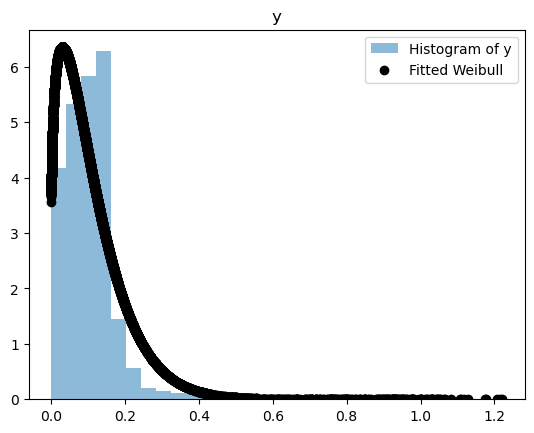

In [6]:
df_clean = pd.read_csv("../data/data_preprocessed_v0.csv",index_col=0)
df_clean["ccf_ad"] = (1.0-df_clean["CCF"])*100
df_clean1 = df_clean[df_clean.recovery_rate>0.0]
# df_clean1["recovery_rate_ad"] = np.where(df_clean1["recovery_rate"]<=0.95,df_clean1["recovery_rate"],0.8)
# df_clean.head()

y_cols = ["recovery_rate","CCF"]

X = df_clean1.drop(columns=y_cols + list(df_clean1.columns)[35:39])
y = df_clean1["recovery_rate"] * 1.0

rv = sc_stats.weibull_min.fit(y)
print (rv)
plt.hist(y,alpha=0.5,density=True,bins=30,label="Histogram of y")
plt.scatter(y, sc_stats.weibull_min.pdf(y,*rv),label="Fitted Weibull",color="black")
plt.title("y")
plt.legend()

In [7]:
y=y-(-0.001305620962548199)
print(X.shape,y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(23300, 44) (23300,)


((18640, 44), (4660, 44), (18640,), (4660,))

(1.2514639771520475, -4.9678433641192203e-05, 0.11713964879374039)


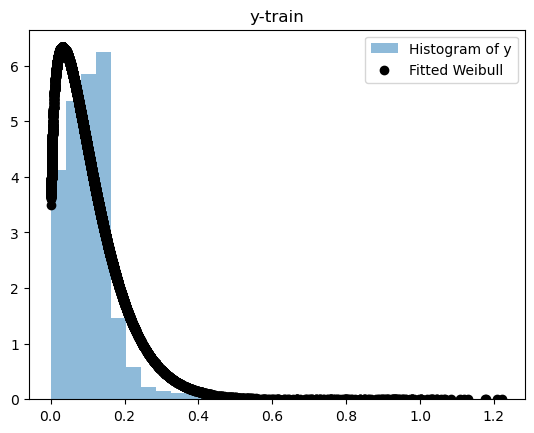

In [9]:
rv = sc_stats.weibull_min.fit(y_train)
print (rv)
plt.hist(y_train,alpha=0.5,density=True,bins=30,label="Histogram of y")
plt.scatter(y_train, sc_stats.weibull_min.pdf(y_train,*rv),label="Fitted Weibull",color="black")
plt.title("y-train")
plt.legend()

Text(0.5, 1.0, 'Distribution of y')

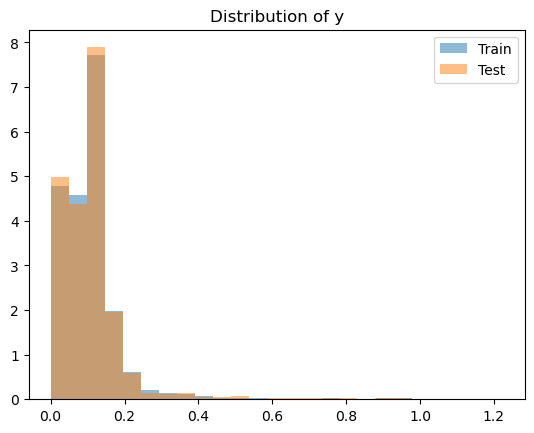

In [10]:
plt.hist(y_train,density=True,alpha=0.5,label="Train",bins=25)
plt.hist(y_test,density=True,alpha=0.5,label="Test",bins=25)
plt.legend()
plt.title("Distribution of y")

### Benchmark Model

In [11]:
edl_model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(64, activation="softmax"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(20, activation="relu"),
        dense_layers.DenseNormalGamma(1),
    ])

def EvidentialRegressionLoss(true, pred):
        return dense_loss.EvidentialRegression(true, pred, coeff=1e-10)

# Compile and fit the model!
edl_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=EvidentialRegressionLoss)

edl_model.fit(x_train, y_train, batch_size=100, epochs=150)

2023-04-25 19:38:28.104517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/150
187/187 [==============================] - 2s 2ms/step - loss: -0.4168
Epoch 2/150
187/187 [==============================] - 0s 2ms/step - loss: -1.2334
Epoch 3/150
187/187 [==============================] - 0s 1ms/step - loss: -1.2484
Epoch 4/150
187/187 [==============================] - 0s 1ms/step - loss: -1.3597
Epoch 5/150
187/187 [==============================] - 0s 1ms/step - loss: -1.5129
Epoch 6/150
187/187 [==============================] - 0s 1ms/step - loss: -1.6033
Epoch 7/150
187/187 [==============================] - 0s 1ms/step - loss: -1.6534
Epoch 8/150
187/187 [==============================] - 0s 2ms/step - loss: -1.7048
Epoch 9/150
187/187 [==============================] - 0s 1ms/step - loss: -1.7315
Epoch 10/150
187/187 [==============================] - 0s 1ms/step - loss: -1.7692
Epoch 11/150
187/187 [==============================] - 0s 2ms/step - loss: -1.7771
Epoch 12/150
187/187 [==============================] - 0s 2ms/step - loss: -1.7890
E

187/187 [==============================] - 0s 2ms/step - loss: -1.8226
Epoch 99/150
187/187 [==============================] - 0s 2ms/step - loss: -1.8258
Epoch 100/150
187/187 [==============================] - 0s 1ms/step - loss: -1.8317
Epoch 101/150
187/187 [==============================] - 0s 1ms/step - loss: -1.8301
Epoch 102/150
187/187 [==============================] - 0s 1ms/step - loss: -1.8253
Epoch 103/150
187/187 [==============================] - 0s 2ms/step - loss: -1.8209
Epoch 104/150
187/187 [==============================] - 0s 1ms/step - loss: -1.8314
Epoch 105/150
187/187 [==============================] - 0s 1ms/step - loss: -1.8273
Epoch 106/150
187/187 [==============================] - 0s 1ms/step - loss: -1.8226
Epoch 107/150
187/187 [==============================] - 0s 1ms/step - loss: -1.8306
Epoch 108/150
187/187 [==============================] - 0s 1ms/step - loss: -1.8232
Epoch 109/150
187/187 [==============================] - 0s 1ms/step - loss: -1.

In [12]:
y_pred = edl_model.predict(x_test)
mu, v, alpha, beta = y_pred[:,0],y_pred[:,1],y_pred[:,2],y_pred[:,3]

146/146 [==============================] - 0s 859us/step


In [13]:
mean_squared_error(y_test,mu)*100/y_test.mean()

8.24991711612155

In [14]:
alpha.min()

1.0000001

In [15]:
var = np.sqrt(beta / (v * (alpha - 1)))
var.mean()

16.530533

/var/folders/kb/v0p0ypbd0wx1q2qb1kpxmmcc0000gn/T/ipykernel_23570/1373794708.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


Text(0.5, 1.0, 'Distribnution of y-pred(Normal)')

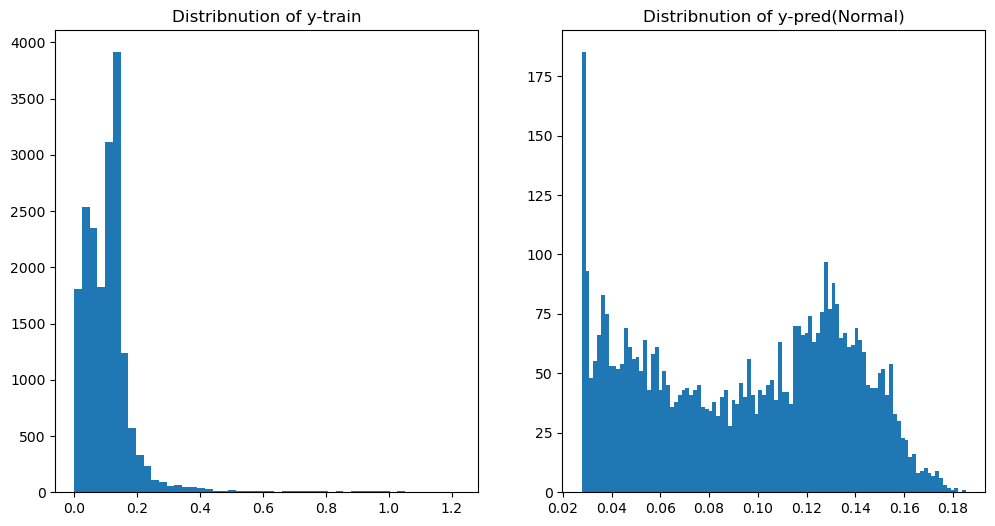

In [16]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plt.subplot(121)
plt.hist(y_train,bins=50)
plt.title("Distribnution of y-train")
plt.subplot(122)
plt.hist(mu,bins=100)
plt.title("Distribnution of y-pred(Normal)")

Text(0.5, 1.0, 'Benchmark evidence regression')

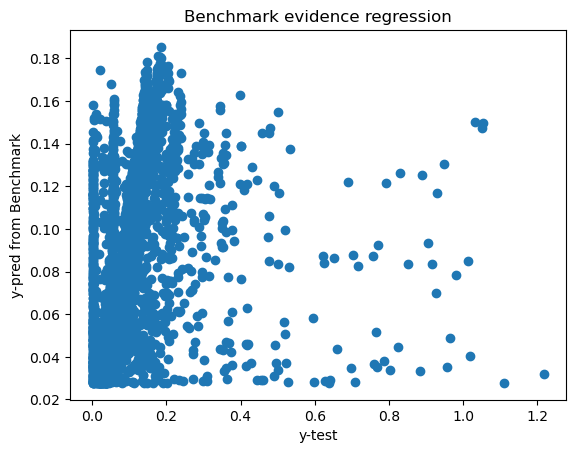

In [19]:
plt.scatter(y_test,mu)
plt.xlabel("y-test")
plt.ylabel("y-pred from Benchmark")
plt.title("Benchmark evidence regression")

### Weibull Model

(1.2514639771520475, -4.9678433641192203e-05, 0.11713964879374039)


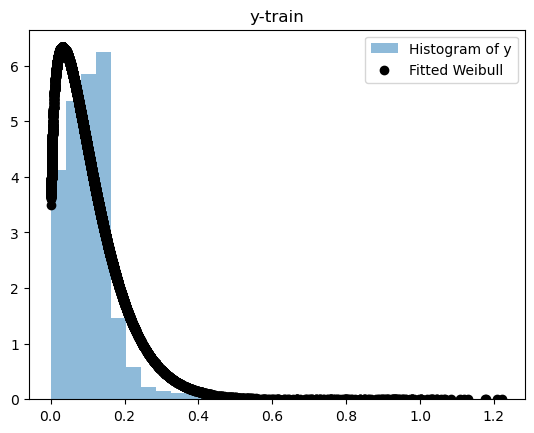

In [20]:
rv = sc_stats.weibull_min.fit(y_train)
print (rv)
plt.hist(y_train,alpha=0.5,density=True,bins=30,label="Histogram of y")
plt.scatter(y_train, sc_stats.weibull_min.pdf(y_train,*rv),label="Fitted Weibull",color="black")
plt.title("y-train")
plt.legend()

In [57]:
x_train.shape

(18640, 44)

In [168]:
k=1.2515
weibull_model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(400, kernel_initializer='normal', activation="relu"),
        tf.keras.layers.Dense(400, kernel_initializer='normal', activation="leaky_relu"),
        tf.keras.layers.Dense(400, kernel_initializer='normal', activation="relu"),
        tf.keras.layers.Dense(350, kernel_initializer='normal', activation="relu"),
        tf.keras.layers.Dense(350, kernel_initializer='normal', activation="leaky_relu"),
        tf.keras.layers.Dense(300, kernel_initializer='normal', activation="relu"),
        tf.keras.layers.Dense(300, kernel_initializer='normal', activation="relu"),
        tf.keras.layers.Dense(250, kernel_initializer='normal', activation="leaky_relu"),
        tf.keras.layers.Dense(250, kernel_initializer='normal', activation="relu"),
        tf.keras.layers.Dense(200, kernel_initializer='normal', activation="relu"),
        tf.keras.layers.Dense(200, kernel_initializer='normal', activation="leaky_relu"),
        loss_and_layers.DenseWeibullGamma(1),
    ])

def weibullLoss(true, pred):
        return loss_and_layers.weibull_evidence_Regression(true, pred, k=k, coeff=70e-17)

# Compile and fit the model!
weibull_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=weibullLoss)
    

In [169]:
weibull_model.fit(x_train, y_train, batch_size=50, epochs=50)

Epoch 1/50
373/373 [==============================] - 5s 8ms/step - loss: -0.7293
Epoch 2/50
373/373 [==============================] - 3s 9ms/step - loss: -0.7812
Epoch 3/50
373/373 [==============================] - 3s 9ms/step - loss: -0.7818
Epoch 4/50
373/373 [==============================] - 3s 9ms/step - loss: -0.7821
Epoch 5/50
373/373 [==============================] - 3s 9ms/step - loss: -0.7830
Epoch 6/50
373/373 [==============================] - 4s 10ms/step - loss: -0.7833
Epoch 7/50
373/373 [==============================] - 3s 9ms/step - loss: -0.7833
Epoch 8/50
373/373 [==============================] - 4s 10ms/step - loss: -0.7835
Epoch 9/50
373/373 [==============================] - 4s 10ms/step - loss: -0.7837
Epoch 10/50
373/373 [==============================] - 4s 10ms/step - loss: -0.7847
Epoch 11/50
373/373 [==============================] - 4s 10ms/step - loss: -0.7873
Epoch 12/50
373/373 [==============================] - 4s 10ms/step - loss: -0.7877
Epoch 1

In [170]:
y_pred = weibull_model.predict(x_test)
alpha,beta = y_pred[:,0],y_pred[:,1]

146/146 [==============================] - 0s 2ms/step


In [171]:
alpha

array([  30.977936, 2525.4583  , 1489.6984  , ..., 1248.1814  ,
       1665.2678  ,  229.4309  ], dtype=float32)

In [172]:
beta

array([  2.040758, 370.86462 , 189.65878 , ..., 154.57602 , 217.3039  ,
        23.556385], dtype=float32)

In [173]:
from scipy.special import loggamma

In [174]:
mean_pred_log = (loggamma(1+ (1/k)) - loggamma(alpha) + loggamma(alpha-(1/k))\
                + (1/k)*np.log(beta))
mu = np.exp(mean_pred_log)

var_term1 = (loggamma(1+ (2/k)) - loggamma(alpha) + loggamma(alpha-(2/k))\
                + (2/k)*np.log(beta))
var = np.exp(var_term1) - np.square(mu)
# var

In [175]:
mean_squared_error(y_test,mu)*100/y_test.mean()

9.696618035914689

In [180]:
var.mean()

0.016991746

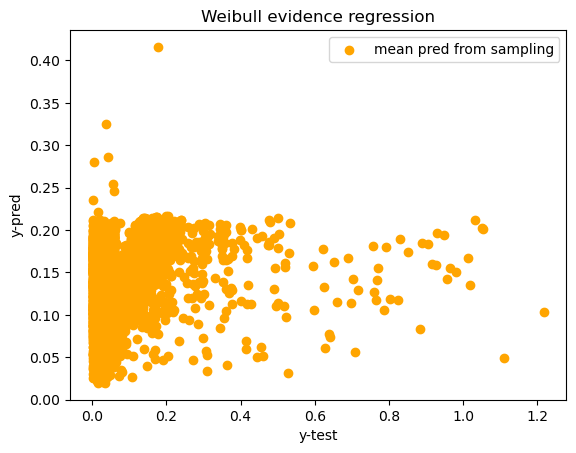

In [179]:
from scipy.stats import invgamma
rv = invgamma(a=alpha,scale=beta*1.0)
theta = rv.rvs()
lambda_weibull = theta**(1/k)
y_pred_check = np.array([lambda_weibull*np.random.weibull(a=k) for i in range(100)]).mean(axis=0)

# plt.plot(x_test,y_test,label="y_test")
plt.scatter(y_test,y_pred_check,color="orange",label="mean pred from sampling")
plt.xlabel("y-test")
plt.ylabel("y-pred")
plt.title("Weibull evidence regression")
plt.legend()

In [165]:
y_pred_check,mu

(array([0.08968802, 0.18036491, 0.17757419, ..., 0.16794468, 0.17476645,
        0.16344219]),
 array([0.09697527, 0.18246305, 0.18117604, ..., 0.18025091, 0.18404828,
        0.18362646], dtype=float32))

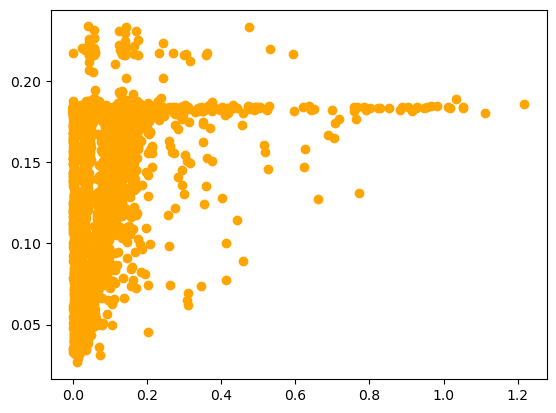

In [166]:
plt.scatter(y_test,mu,color="orange",label="mean pred from analytical")

 56/146 [==========>...................] - ETA: 0s

/var/folders/kb/v0p0ypbd0wx1q2qb1kpxmmcc0000gn/T/ipykernel_23570/2438399462.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


146/146 [==============================] - 0s 904us/step


Text(0.5, 1.0, 'Distribnution of y-pred (Weibull)')

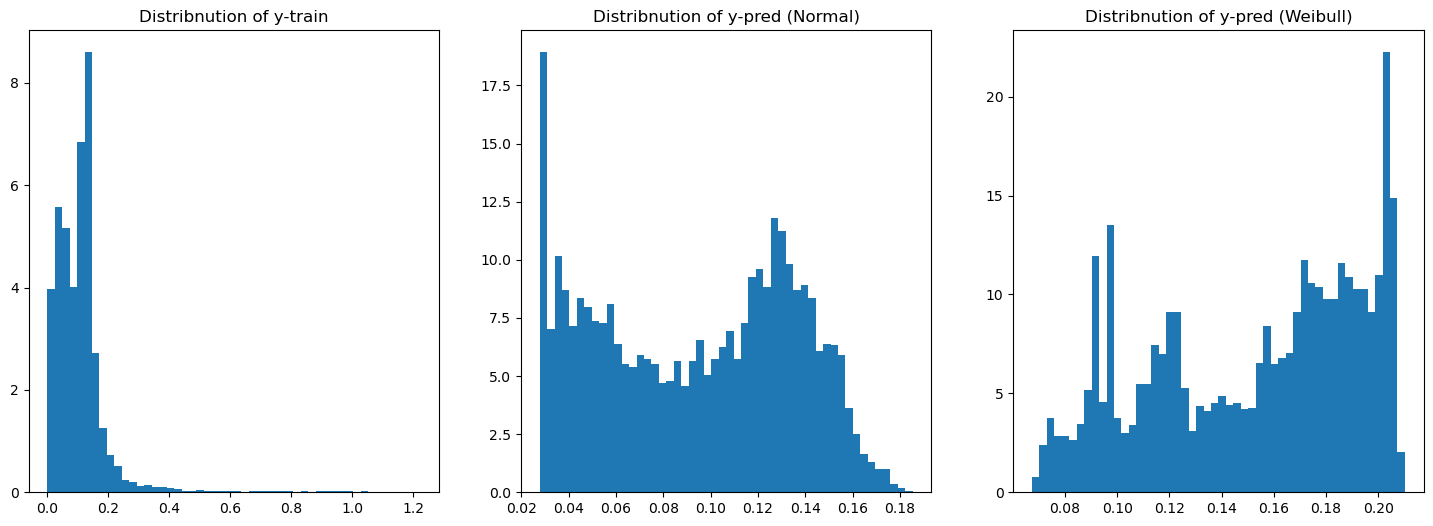

In [178]:
fig,ax=plt.subplots(figsize=(18,6))
plt.subplot(131)
plt.hist(y_train,bins=50,density=True)
plt.title("Distribnution of y-train")
plt.subplot(132)
plt.hist(edl_model.predict(x_test)[:,0],bins=50,density=True)
plt.title("Distribnution of y-pred (Normal)")
plt.subplot(133)
plt.hist(mu,bins=50,density=True)
plt.title("Distribnution of y-pred (Weibull)")